Nama : Ni Putu Sintia Wati <br>
email : sintiawati.putu04@gmail.com

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile,os
local_zip = '/content/drive/MyDrive/satellite-image-classification.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/content')
zip_ref.close()

In [3]:
base_dir = '/content/data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [4]:
train_data = os.path.join(base_dir, "cloudy", "desert", "green_area", "water")
validation_data = os.path.join(base_dir, "cloudy", "desert", "green_area", "water")
test_data = os.path.join(base_dir, "cloudy", "desert", "green_area", "water")

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_data_generator = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=30,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split=0.2,)
 
# val_data_generator = ImageDataGenerator(
#                     rescale=1./255,
#                     rotation_range=23,
#                     horizontal_flip=True,
#                     shear_range = 0.2,
#                     fill_mode = 'nearest',
#                     validation_split=0.2)

In [6]:
training_generator = train_data_generator.flow_from_directory(
        base_dir,  
        target_size=(150, 150),
        color_mode = "rgb",
        class_mode = "categorical",
        batch_size = 16, 
        seed = 0, 
        shuffle = True,
        subset='training')
 
validation_generator = train_data_generator.flow_from_directory(
        base_dir, 
        target_size=(150, 150),  
        color_mode = "rgb",
        class_mode = "categorical",
        seed = 0,
        shuffle = False,
        subset='validation')

Found 4505 images belonging to 4 classes.
Found 1126 images belonging to 4 classes.


In [7]:
# melakukan augmentasi gambar

import tensorflow as tf
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(4, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer= tf.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [9]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.85 and logs.get('val_accuracy') > 0.85):
      print("\nAkurasi telah mencapai > 85%")
      self.model.stop_training = True

callbacks = myCallback()

In [10]:
history = model.fit(
      training_generator,
      steps_per_epoch=100,
      epochs=20, 
      validation_data=validation_generator, 
      validation_steps=2,  
      verbose=2,
      callbacks = [callbacks]
      )

Epoch 1/20
100/100 - 23s - loss: 0.6574 - accuracy: 0.6331 - val_loss: 0.5359 - val_accuracy: 0.7500 - 23s/epoch - 227ms/step
Epoch 2/20
100/100 - 12s - loss: 0.5920 - accuracy: 0.6660 - val_loss: 1.0250 - val_accuracy: 0.5625 - 12s/epoch - 117ms/step
Epoch 3/20
100/100 - 11s - loss: 0.5166 - accuracy: 0.7056 - val_loss: 0.5999 - val_accuracy: 0.7500 - 11s/epoch - 112ms/step
Epoch 4/20
100/100 - 11s - loss: 0.4958 - accuracy: 0.7219 - val_loss: 0.2537 - val_accuracy: 0.8594 - 11s/epoch - 114ms/step
Epoch 5/20
100/100 - 18s - loss: 0.5080 - accuracy: 0.7362 - val_loss: 0.5937 - val_accuracy: 0.7656 - 18s/epoch - 183ms/step
Epoch 6/20
100/100 - 12s - loss: 0.5026 - accuracy: 0.7656 - val_loss: 0.1616 - val_accuracy: 0.9062 - 12s/epoch - 119ms/step
Epoch 7/20
100/100 - 11s - loss: 0.4003 - accuracy: 0.8399 - val_loss: 0.1078 - val_accuracy: 0.9688 - 11s/epoch - 114ms/step
Epoch 8/20
100/100 - 11s - loss: 0.3384 - accuracy: 0.8744 - val_loss: 0.5457 - val_accuracy: 0.7656 - 11s/epoch - 114

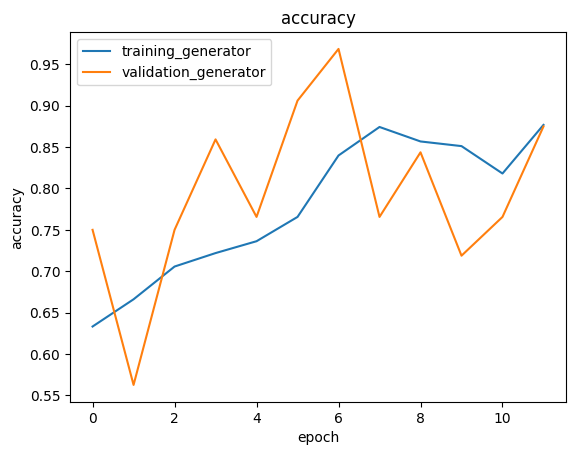

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training_generator', 'validation_generator'], loc='upper left')
plt.show()

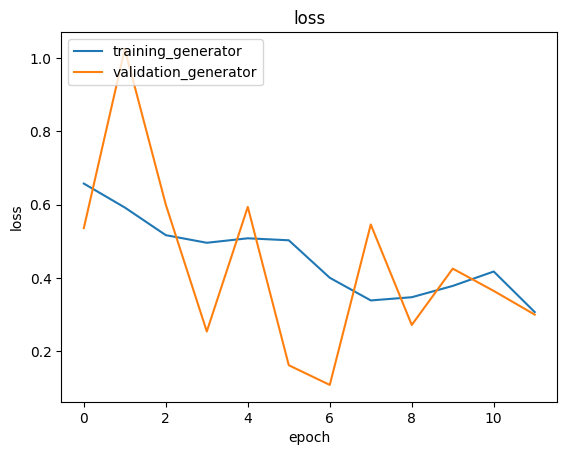

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training_generator', 'validation_generator'], loc='upper left')
plt.show()

In [ ]:
# import numpy as np
# from google.colab import files
# from keras.preprocessing import image
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# %matplotlib inline
 
# uploaded = files.upload()
 
# for fn in uploaded.keys():
 
#   # memprediksi gambar
#   path = fn
#   img = image.load_img(path, target_size=(150,150))
#   imgplot = plt.imshow(img)
#   x = image.img_to_array(img)
#   x = np.expand_dims(x, axis=0)
 
#   images = np.vstack([x])
#   classes = model.predict(images, batch_size=10)
 
#   print("\n")
#   print('Hasil Prediksi : ',classes[0],'\n')
  
#   print(fn)
#   if classes[0][0] == 1:
#     print( "cloudy")
#   elif classes[0][1] == 1:
#     print("desert")
#   elif classess[0][2] == 1 :
#     print("green_area")
#   else :
#     print("water")

In [ ]:
# # save using TFlite
# import tensorflow as tf

# converter = tf.lite.TFLiteConverter.from_keras_model(model)
# tflite_model = converter.convert()

# with open('RPS_model.tflite', 'wb') as f:
#   f.write(tflite_model)

In [13]:
model.save('model-example.h5')